In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Define centers for the blobs
centers = [[2, 2], [4, 5], [10, 10]]  # First two blobs are close to each other

# Generate the blobs
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=1.0, random_state=42)

In [4]:
def scatterplot(ax, X, y, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='black', lw=.5, alpha=.8)
    ax.set_title(title)
    plt.show()

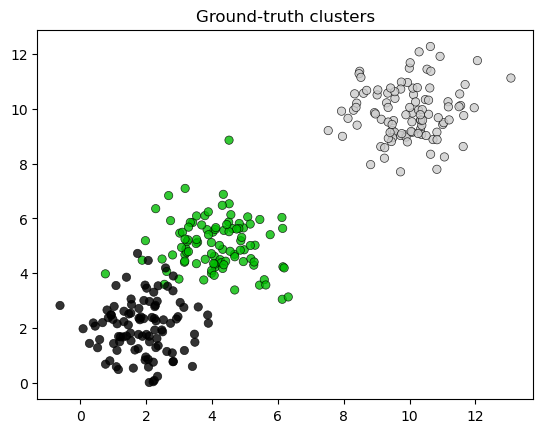

In [5]:
fig, ax = plt.subplots()
scatterplot(ax, X, y, 'Ground-truth clusters')

In [6]:
N, D = X.shape
X1 = X.reshape(N, 1, D)
X2 = X.reshape(1, N, D)
pairwise_distances = np.sqrt(((X1 - X2) ** 2).sum(axis=-1))

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
def get_k_dist(pairwise_distances, index, min_samples=4):
    return np.sort(pairwise_distances[index])[min_samples - 1]

In [16]:
def get_n_outliers(X, eps, min_samples=4):
    y_pred = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    return (y_pred == -1).sum()

In [25]:
def n_clusters_range(X, eps, min_samples=4):
    y_pred = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    return np.unique(y_pred[y_pred >= 0]).shape[0]

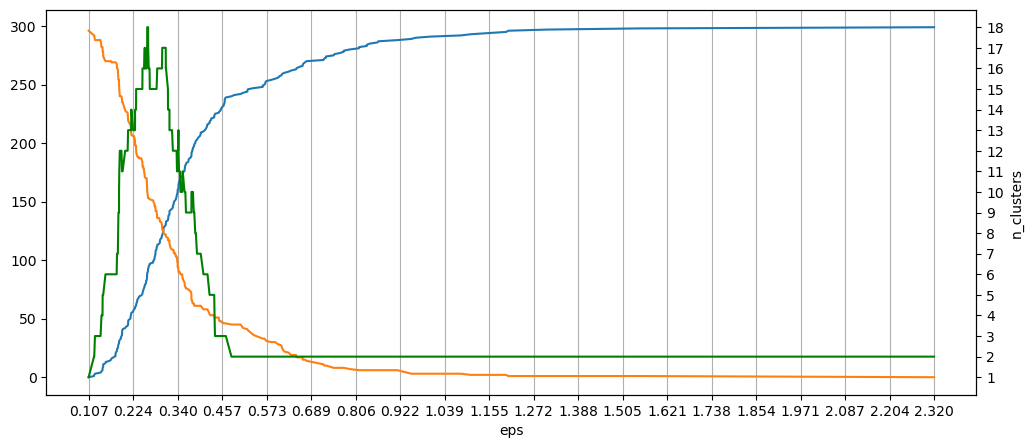

In [40]:
indices = np.arange(X.shape[0])
k_distances = np.sort(np.vectorize(get_k_dist, excluded=[0, 2])(pairwise_distances, indices))
n_outliers_range = np.vectorize(get_n_outliers, excluded=[0, 2])(X, k_distances)
n_clusters_range = np.vectorize(get_n_clusters, excluded=[0, 2])(X, k_distances)

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(k_distances, indices)
ax1.plot(k_distances, n_outliers_range)

ax2 = ax1.twinx()
ax2.plot(k_distances, n_clusters_range, color='green')
ax2.set_yticks(np.arange(1, 1 + np.max(n_clusters_range)))
ax2.set_ylabel('n_clusters')

ax1.set_xlabel('eps')
ax1.set_xticks(np.linspace(k_distances[0], k_distances[-1], num=20))
ax1.grid(axis='x')
# ax1.set_xlim(.340, .461)

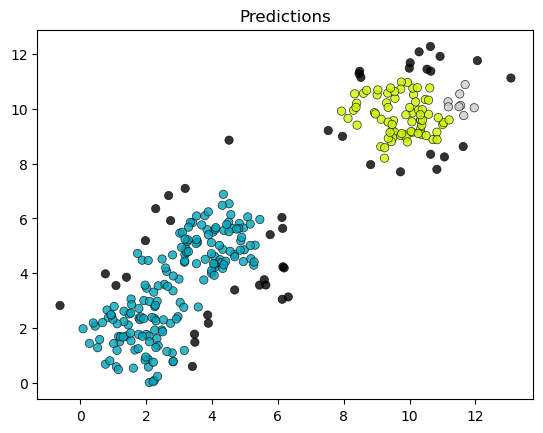

In [41]:
y_pred = DBSCAN(eps=.46, min_samples=4).fit_predict(X)
fig, ax = plt.subplots()
scatterplot(ax, X, y_pred, 'Predictions')